# Visualizaciones en Python

### Santiago Damian Reyes - [santiagodamianreyes@gmail.com](mailto:santiagodamianreyes@gmail.com)

## Librerias + Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
path = '/content/drive/MyDrive/Colab Notebooks/Coderhouse/produccion-de-carne-bovina.csv'
data = pd.read_csv(path, encoding="latin-1")

## Descripción del dataset

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2598 entries, 0 to 2597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pais_id                   2598 non-null   int64  
 1   pais                      2598 non-null   object 
 2   provincia_id              2598 non-null   int64  
 3   provincia                 2598 non-null   object 
 4   departamento_id           2598 non-null   int64  
 5   departamento              2598 non-null   object 
 6   prov_depto                2598 non-null   int64  
 7   año                       2598 non-null   int64  
 8   mes                       2598 non-null   int64  
 9   modelo                    2598 non-null   object 
 10  actividad                 2598 non-null   object 
 11  referencia                2598 non-null   object 
 12  margen_bruto_($/ha)       2598 non-null   int64  
 13  resultado_neto_($/ha)     2598 non-null   int64  
 14  ingreso_

El dataset incluye las siguientes variables:

* `pais_id`: Identificador del país (Argentina).
* `pais`: Nombre del país (Argentina).
* `provincia_id`: Identificador de la provincia.
* `provincia`: Nombre de la provincia.
* `departamento_id`: Identificador del departamento.
* `departamento`: Nombre del departamento.
* `prov_depto`: Identificador combinado de provincia y departamento.
* `año`: Año de registro de los datos.
* `mes`: Mes de registro de los datos.
* `modelo`: Modelo de producción.
* `actividad`: Actividad de producción.
* `referencia`: Referencia del registro.
* `margen_bruto_($/ha)`: Margen bruto en dólares por hectárea.
* `resultado_neto_($/ha)`: Resultado neto en dólares por hectárea.
* `ingreso_neto_($/ha)`: Ingreso neto en dólares por hectárea.
* `gastos_directos_($/ha)`: Gastos directos en dólares por hectárea.
* `costos_indirectos_($/ha)`: Costos indirectos en dólares por hectárea.
* `eficiencia_stock_(%)`: Eficiencia de stock en porcentaje.
* `producción_(kg/ha)`: Producción de carne en kilogramos por hectárea.
* `destete_(%)`: Porcentaje de destete.
* `carga_(kg/ha)`: Carga de ganado en kilogramos por hectárea.
* `Unnamed: 21`, `Unnamed: 22`, `Unnamed: 23`: Columnas no identificadas.



Como las 3 últimas columnas no son relevantes al analisis ni a la visualización, las eliminamos

In [14]:
data = data.drop(data.columns[-3:], axis=1)

## Visualizaciones

Vamos a buscar responder la siguiente pregunta: **¿Como fue evolucionando la producción de carne vacuna en argentina a lo largo del tiempo?**

### Histograma de la producción de carne por provincia

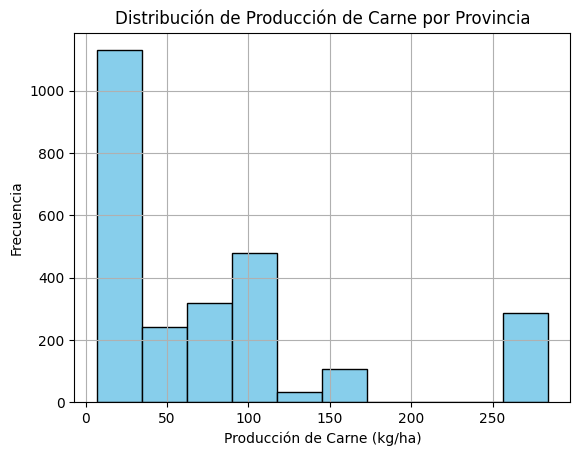

In [6]:
plt.hist(data['producción_(kg/ha)'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Producción de Carne (kg/ha)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Producción de Carne por Provincia')
plt.grid(True)
plt.show()

Este histograma nos proporcionaría una visión general de cómo se distribuye la producción de carne por hectárea en diferentes provincias a lo largo del tiempo.

Podemos observar la mayoria de las provincias tienen una producción de carne relativamente baja, siendo muy pocas las que presentan mayor producción de carne.

### Diagrama de dispersión entre ingreso neto y producción de carne

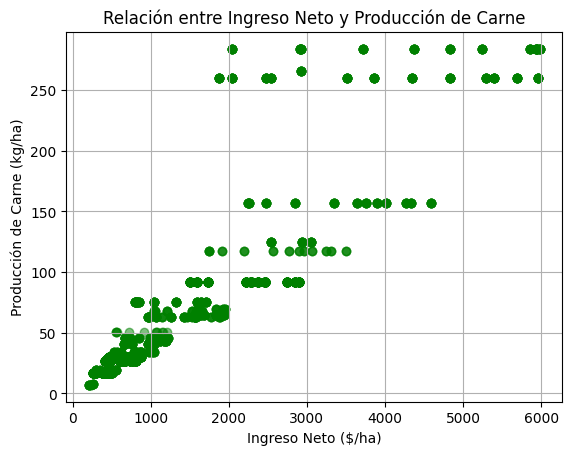

In [7]:
plt.scatter(data['ingreso_neto_($/ha)'], data['producción_(kg/ha)'], color='green', alpha=0.5)
plt.xlabel('Ingreso Neto ($/ha)')
plt.ylabel('Producción de Carne (kg/ha)')
plt.title('Relación entre Ingreso Neto y Producción de Carne')
plt.grid(True)
plt.show()

Este diagrama de dispersión nos ayudaría a identificar si hay alguna tendencia o patrón entre el ingreso neto por hectárea y la producción de carne a lo largo del tiempo.

Observamos que hay una alta concentración de puntos en los rangos de 0 a 50 para la producción y de 0 a 1000 para el ingreso neto, indicando que hay una gran cantidad de casos donde la producción de carne es baja y el ingreso neto es relativamente bajo también.

Podemos ver tambien que a medida que aumentan los ingreso,  la cantidad de puntos tiende a disminuir. Esto sugiere que hay menos provincias con ingresos netos altos en comparación con aquellos con ingresos netos bajos.

### Gráfico de barras de la eficiencia de stock por año

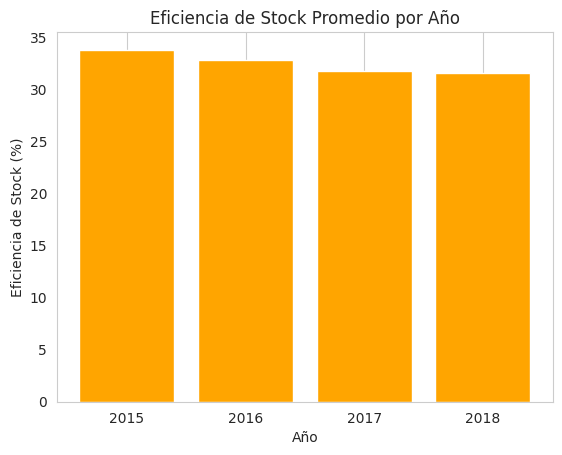

In [16]:
mean_efficiency = data.groupby('año')['eficiencia_stock_(%)'].mean() # Agrupar los datos por año y calcular la eficiencia de stock promedio
plt.bar(mean_efficiency.index, mean_efficiency.values, color='orange')
plt.xlabel('Año')
plt.ylabel('Eficiencia de Stock (%)')
plt.title('Eficiencia de Stock Promedio por Año')
plt.grid(axis='y')
plt.xticks(np.arange(min(mean_efficiency.index), max(mean_efficiency.index)+1, 1))  # Establecer los ticks del eje x como enteros
plt.show()

Observamos que las barras van disminuyendo a medida que pasa el tiempo, lo que significaria que la eficiencia de stock promedio ha disminuido en el transcurso de los años.

Vemos que la eficiencia de stock promedio era de aproximadamente 34% en 2015 y termina en alrededor del 31% en 2018, indicando que, en promedio, las explotaciones ganaderas han sido menos eficientes en la gestión de su stock con el tiempo.

Esta disminución en la eficiencia de stock podría tener diversas causas, como cambios en las prácticas de gestión, fluctuaciones en las condiciones climáticas, variaciones en los precios de los insumos, entre otros factores.

### Gráfico de barras del ingreso neto por provincia

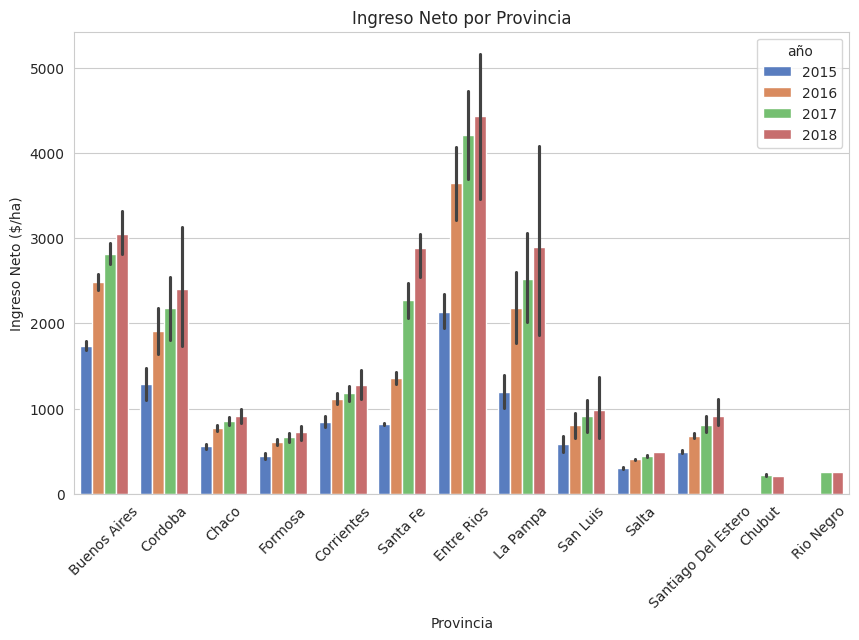

In [12]:
sns.set_style('whitegrid') # Configurar el estilo de seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='provincia', y='ingreso_neto_($/ha)', hue='año', data=data, palette='muted')
plt.xlabel('Provincia')
plt.ylabel('Ingreso Neto ($/ha)')
plt.title('Ingreso Neto por Provincia')
plt.xticks(rotation=45)
plt.show()

Este gráfico nos proporciona información valiosa sobre la disparidad en los ingresos netos entre las diferentes provincias a lo largo del tiempo.

La distinción por año nos permite observar cómo ha evolucionado el ingreso neto en cada provincia a lo largo de los años. Se observa que algunas provincias, como Entre Ríos, tienen ingresos netos más altos en comparación con otras, como Chubut y Río Negro, que muestran ingresos casi nulos, especialmente en los años 2015 y 2016.

Además, se pueden identificar tendencias de crecimiento en el ingreso neto para cada provincia a lo largo de los años. Por ejemplo, la mayoría de las provincias experimentaron saltos significativos de ingresos de 2015 a 2016, pero luego muestran un crecimiento más lineal. Sin embargo, hay excepciones, como Buenos Aires, Córdoba, La Pampa y Entre Ríos, que también tuvieron saltos en esos años pero muestran un crecimiento más sostenido en comparación con otras provincias.

Por otro lado, provincias como Chaco, Formosa y Salta muestran un crecimiento menos significativo o incluso nulo en comparación con otras. Esto podría ser indicativo de diferencias en las condiciones económicas, políticas o sociales entre las provincias, que pueden influir en el desempeño económico de la producción de carne en cada región.

### Mapa de calor de la matriz de correlación

<ipython-input-15-0228c3d26237>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr() # Calcular la matriz de correlación


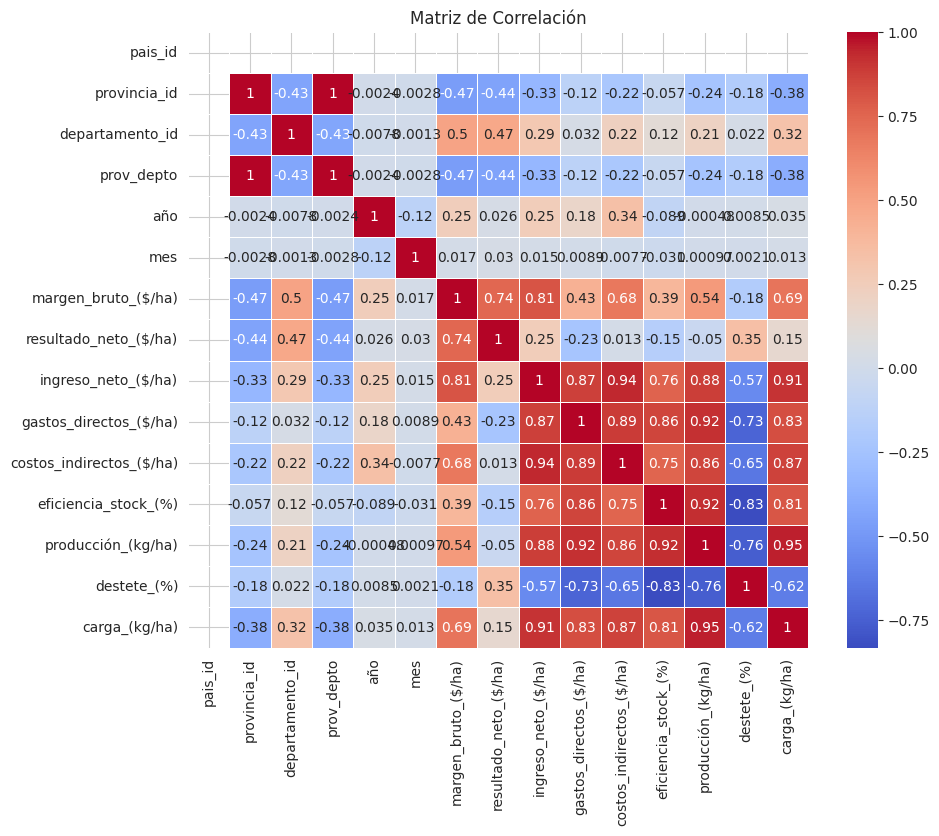

In [15]:
corr_matrix = data.corr() # Calcular la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5) # Crear el mapa de calor
plt.title('Matriz de Correlación')
plt.show()

El Mapa de calor de la matriz de correlación nos proporciona información sobre la relación entre todas las variables del conjunto de datos. Al interpretar este mapa de calor, podemos identificar las correlaciones más fuertes entre las variables y comprender mejor cómo están relacionadas.

Las correlaciones más fuertes se encuentran entre las variables a partir de `margen_bruto` en adelante, lo cual es esperable ya que estas variables están más directamente relacionadas con la producción y los resultados económicos de la actividad ganadera. Las variables identificatorias suelen tener correlaciones más débiles porque no están directamente relacionadas con la producción o los resultados económicos.

Algunas correlaciones que destacas son:

* Carga y producción con 0.95: Esto sugiere una correlación positiva muy fuerte entre la carga de animales por hectárea y la producción de carne por hectárea. Es esperable que a mayor carga, haya una mayor producción de carne, siempre y cuando se mantenga un equilibrio adecuado para evitar la sobrecarga y el deterioro de la productividad del suelo.

* Ingresos netos y costos indirectos con 0.94: Esta correlación positiva fuerte indica que los ingresos netos tienden a aumentar o disminuir en consonancia con los costos indirectos. Esto sugiere que los costos indirectos pueden tener un impacto significativo en la rentabilidad de la actividad ganadera.

* Destete y eficiencia stock con -0.83: Esta correlación negativa sugiere una relación inversa entre el porcentaje de destete y la eficiencia de stock. Un menor porcentaje de destete puede indicar una menor eficiencia en la gestión del stock de ganado, lo cual puede afectar negativamente la producción y los resultados económicos.

* Producción y destete con -0.76: Esta correlación negativa sugiere que un mayor porcentaje de destete está asociado con una menor producción de carne por hectárea. Esto puede deberse a diversas razones, como problemas de salud del ganado, falta de recursos alimenticios adecuados, entre otros factores.

* Destete y gastos indirectos con -0.73: Esta correlación negativa sugiere que un mayor porcentaje de destete está asociado con menores gastos indirectos. Esto puede indicar que una menor eficiencia en la gestión del stock de ganado puede estar relacionada con una menor cantidad de gastos indirectos en la actividad ganadera.

### Gráfico de línea de la producción de carne a lo largo del tiempo

<ipython-input-17-add513c5151b>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='año', y='producción_(kg/ha)', data=data, ci=None) # Crear el gráfico de línea


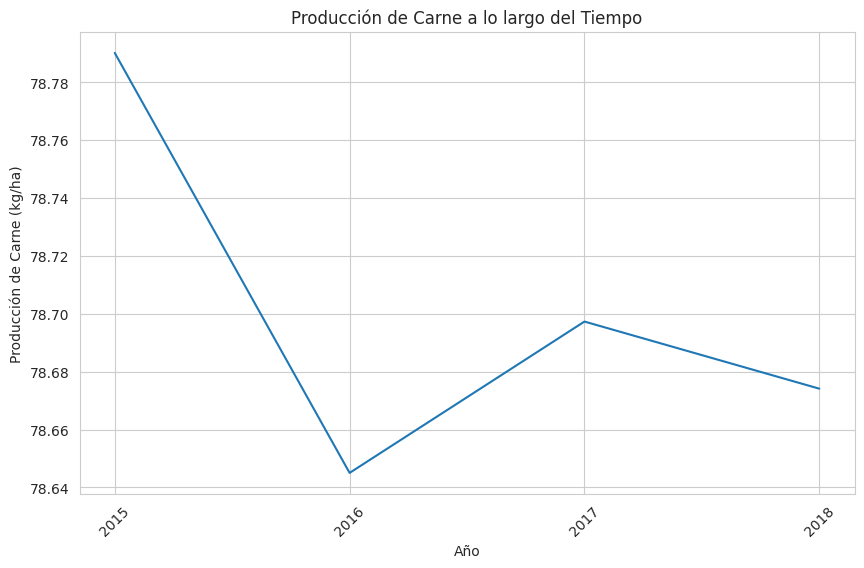

In [17]:
sns.set_style('whitegrid') # Configurar el estilo de seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='año', y='producción_(kg/ha)', data=data, ci=None) # Crear el gráfico de línea
plt.xlabel('Año')
plt.ylabel('Producción de Carne (kg/ha)')
plt.title('Producción de Carne a lo largo del Tiempo')
plt.xticks(np.arange(min(data['año']), max(data['año'])+1, 1), rotation=45)
plt.show()

El gráfico nos proporciona una visualización directa de cómo ha evolucionado la producción de carne por hectárea a lo largo de los años, donde podremos identificar tendencias y patrones en la producción a lo largo del tiempo.

La producción de carne comienza cerca de 78.79 en 2015 y luego experimenta fluctuaciones en los años siguientes, bajando a casi 78.65 en 2016, remonta a casi 78.70 en 2017 y vuelve a caer a un poco por debajo de 78.68 en 2018.

Estas fluctuaciones en la producción de carne a lo largo de los años pueden ser el resultado de diversos factores, como condiciones climáticas variables, cambios en las prácticas de manejo del ganado, fluctuaciones en los precios de los insumos, entre otros. Por ejemplo, un año con condiciones climáticas desfavorables podría afectar negativamente la producción de carne, mientras que un año con buenas condiciones podría llevar a un aumento en la producción.

La tendencia general de la producción de carne a lo largo de los años, con altibajos pero sin una tendencia clara de crecimiento o disminución significativa, sugiere cierta estabilidad en la producción a pesar de las variaciones anuales.

## Conclusión

La evolución de la producción de carne vacuna en Argentina a lo largo del tiempo ha sido variable y está influenciada por una serie de factores. Se observa que la mayoría de las provincias tienen una producción de carne relativamente baja, con solo algunas presentando una mayor producción. Además, hay una alta concentración de puntos en los rangos de producción y de ingreso neto más bajos, lo que indica que hay una gran cantidad de casos donde la producción de carne es baja y el ingreso neto es relativamente bajo también. A medida que aumentan los ingresos, la cantidad de provincias con ingresos netos altos tiende a disminuir, lo que sugiere una distribución desigual de los ingresos en el sector ganadero.

En términos de eficiencia de stock, se observa una disminución en la eficiencia promedio a lo largo del tiempo, lo que indica que las explotaciones ganaderas han sido menos eficientes en la gestión de su stock con el paso de los años. Además, se identifican diferencias significativas en los ingresos netos por provincia a lo largo de los años, con algunas provincias mostrando un crecimiento más sostenido en comparación con otras. Por otro lado, provincias como Chaco, Formosa y Salta muestran un crecimiento menos significativo o nulo, lo que puede reflejar diferencias en las condiciones económicas y políticas entre las regiones.

En cuanto a la producción de carne en sí misma, se observan fluctuaciones a lo largo de los años, con aumentos y disminuciones en la producción en diferentes períodos. Estas fluctuaciones pueden ser el resultado de diversos factores, como condiciones climáticas variables, cambios en las prácticas de manejo del ganado y fluctuaciones en los precios de los insumos. A pesar de estas fluctuaciones, no se observa una tendencia clara de crecimiento o disminución significativa en la producción de carne a lo largo del tiempo, lo que sugiere cierta estabilidad en la producción a pesar de las variaciones anuales.